In [1]:
#importing necessary libraries
#downloading necessary NLTK resources

import pandas as pd 
import numpy as np 
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\praju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
%pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached regex-2025.9.1-cp312-cp312-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2025.9.1-cp312-cp312-win_amd64.whl (275 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\nltk.exe' -> 'c:\\Python312\\Scripts\\nltk.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\praju\OneDrive\Desktop\customer_reviews_clustering


In [ ]:
#Loading the dataset and creating a dataframe
df = pd.read_csv("amazon_reviews.csv")
df

,Reviewer ID,Product Purchased,Customer Name,Review Text,Rating
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,No issues.,4
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"Purchased this for my device, it worked as adv...",5
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,it works as expected. I should have sprung for...,4
3,A3H99DFEG68SR,B007WTAJTO,1m2,This think has worked out great.Had a diff. br...,5
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"Bought it with Retail Packaging, arrived legit...",5
...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""",I bought this Sandisk 16GB Class 10 to use wit...,1
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,Used this for extending the capabilities of my...,5
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,Great card that is very fast and reliable. It ...,5
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,Good amount of space for the stuff I want to d...,5


In [ ]:
# Keep only relevant columns (review text + rating)
df = df[["Review Text", "Rating"]]

# Dropping missing values
df.dropna(inplace=True)

# Extracting reviews column as text
reviews = df["Review Text"].astype(str)

print("Cleaned dataset shape:", df.shape)
reviews.head()


Cleaned dataset shape: (4912, 2)


0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: Review Text, dtype: object

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords + Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
cleaned_reviews = reviews.apply(clean_text)

print("Sample cleaned review:\n", cleaned_reviews.iloc[0])


Sample cleaned review:
 issue


In [ ]:
# Convert text into numerical form
vectorizer = TfidfVectorizer(max_features=1000)  # adjust max_features if needed
X = vectorizer.fit_transform(cleaned_reviews)

print("TF-IDF Matrix shape:", X.shape)


TF-IDF Matrix shape: (4912, 1000)


DATA ANALYSIS

In [ ]:
# step1_load.py

import pandas as pd

# Load your dataset
df = pd.read_csv("amazon_reviews.csv")

# Show first few rows
print("First 5 rows:")
print(df.head())

# Show column names
print("\nColumn names:")
print(df.columns)

# Show dataset shape
print("\nShape of dataset:", df.shape)


First 5 rows:
      Reviewer ID Product Purchased Customer Name  \
0  A3SBTW3WS4IQSN        B007WTAJTO           NaN   
1  A18K1ODH1I2MVB        B007WTAJTO          0mie   
2  A2FII3I2MBMUIA        B007WTAJTO           1K3   
3   A3H99DFEG68SR        B007WTAJTO           1m2   
4  A375ZM4U047O79        B007WTAJTO  2&amp;1/2Men   

                                         Review Text  Rating  
0                                         No issues.       4  
1  Purchased this for my device, it worked as adv...       5  
2  it works as expected. I should have sprung for...       4  
3  This think has worked out great.Had a diff. br...       5  
4  Bought it with Retail Packaging, arrived legit...       5  

Column names:
Index(['Reviewer ID', 'Product Purchased', 'Customer Name', 'Review Text',
       'Rating'],
      dtype='object')

Shape of dataset: (4915, 5)


In [ ]:
# --- 1. Popular products (top 5) ---
popular_products = df["Product Purchased"].value_counts().head(5)

In [ ]:
# --- 2. Average ratings per product ---
avg_ratings = df.groupby("Product Purchased")["Rating"].mean().sort_values(ascending=False).head(5)

In [ ]:
# --- 3. Overall average rating ---
overall_avg = df["Rating"].mean()

In [ ]:
# --- 4. Distribution summary ---
rating_counts = df["Rating"].value_counts().sort_index()

In [ ]:
# Print insights
print("\n📊 Insights from EDA:")
print("-" * 40)
print("Most Purchased Products:\n", popular_products, "\n")
print("Products with Highest Average Ratings:\n", avg_ratings, "\n")
print(f"Overall Average Rating: {overall_avg:.2f}")
print("\nRatings Distribution:\n", rating_counts)
print("-" * 40)
print("✅ Insights generated. Save this output for reporting.")


📊 Insights from EDA:
----------------------------------------
Most Purchased Products:
 Product Purchased
B007WTAJTO    4915
Name: count, dtype: int64 

Products with Highest Average Ratings:
 Product Purchased
B007WTAJTO    4.587589
Name: Rating, dtype: float64 

Overall Average Rating: 4.59

Ratings Distribution:
 Rating
1     244
2      80
3     142
4     527
5    3922
Name: count, dtype: int64
----------------------------------------
✅ Insights generated. Save this output for reporting.


✅ Top 10 Most Reviewed Products:
Product Purchased
B007WTAJTO    4915
Name: count, dtype: int64


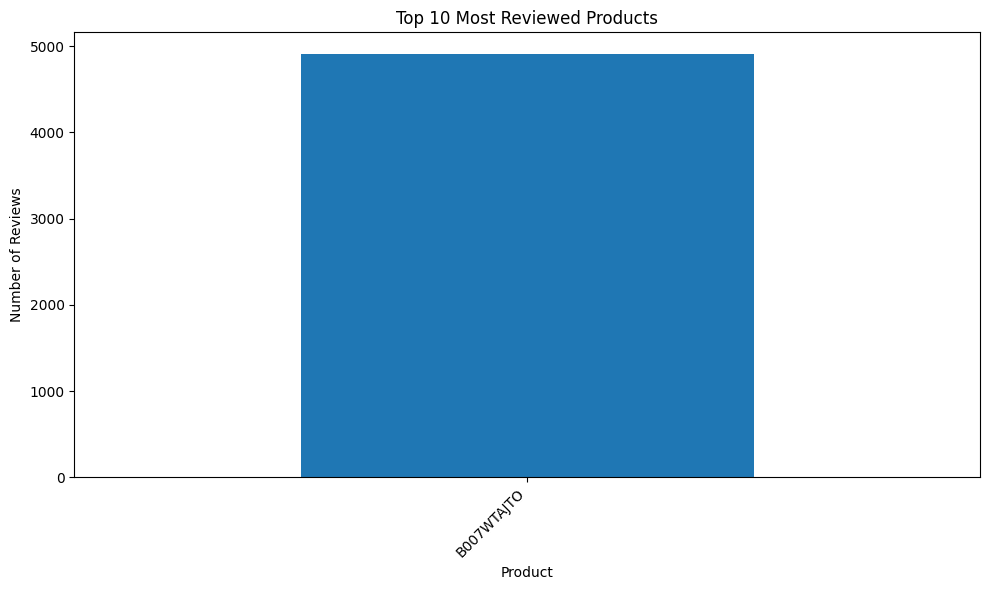

✅ Saved plot: top_products.png


In [ ]:
# step3_product_distribution.py

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("amazon_reviews.csv")

# Count number of reviews per product
product_counts = df["Product Purchased"].value_counts().head(10)  # Top 10 products

# --- Print top products ---
print("✅ Top 10 Most Reviewed Products:")
print(product_counts)

# --- Bar chart of top products ---
plt.figure(figsize=(10,6))
product_counts.plot(kind="bar")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()

print("✅ Saved plot: top_products.png")

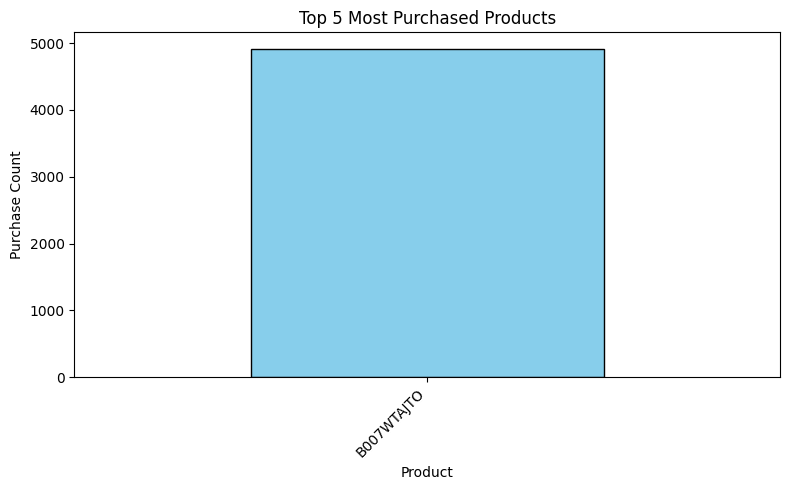

In [ ]:
# --- PLOTS ---
# Plot 1: Top 5 Popular Products
plt.figure(figsize=(8,5))
popular_products.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Most Purchased Products")
plt.xlabel("Product")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("popular_products.png")
plt.show()

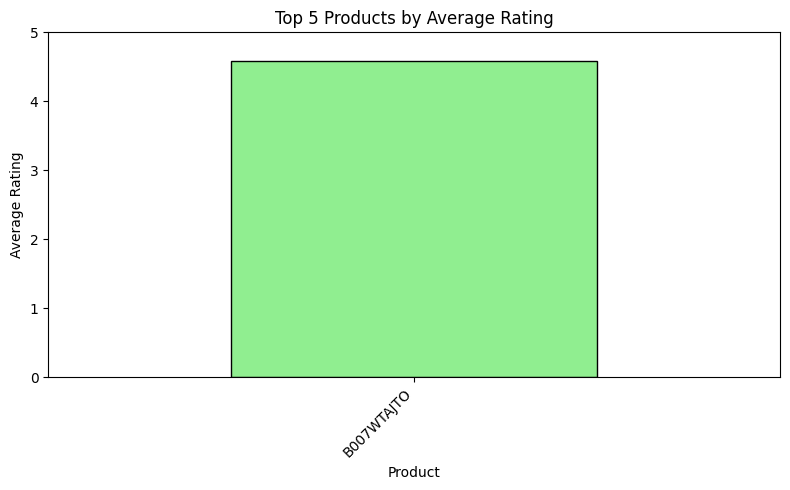

In [ ]:
# Plot 2: Top 5 Products by Average Rating
plt.figure(figsize=(8,5))
avg_ratings.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Top 5 Products by Average Rating")
plt.xlabel("Product")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 5)   # ratings are 1–5
plt.tight_layout()
plt.savefig("top_rated_products.png")
plt.show()

Index(['Reviewer ID', 'Product Purchased', 'Customer Name', 'Review Text',
       'Rating'],
      dtype='object')


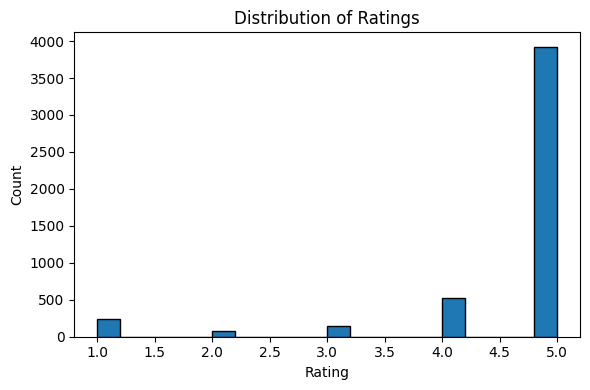

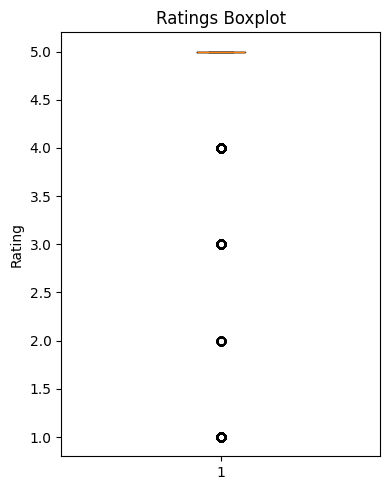

✅ Saved plots: ratings_histogram.png and ratings_boxplot.png


In [2]:
import pandas as pd

df = pd.read_csv("amazon_reviews.csv")
print(df.columns)

# ratings_distribution.py

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("amazon_reviews.csv")

# Use the 'Rating' column for ratings (numeric)
ratings = pd.to_numeric(df["Rating"], errors="coerce")

# --- Histogram of ratings ---
plt.figure(figsize=(6,4))
ratings.plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("ratings_histogram.png")   # save plot
plt.show()

# --- Boxplot of ratings ---
plt.figure(figsize=(4,5))
plt.boxplot(ratings.dropna(), vert=True)
plt.title("Ratings Boxplot")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("ratings_boxplot.png")     # save plot
plt.show()

print("✅ Saved plots: ratings_histogram.png and ratings_boxplot.png")

DATA CLUSTERING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [ ]:
%pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv("amazon_reviews.csv")

# Check columns
print(df.columns)

# Remove empty reviews
df = df.dropna(subset=['Review Text'])

# Take reviews as array
reviews = df['Review Text'].values
print("Number of reviews:", len(reviews))

Index(['Reviewer ID', 'Product Purchased', 'Customer Name', 'Review Text',
       'Rating'],
      dtype='object')
Number of reviews: 4914


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(reviews)

print("TF-IDF shape:", X.shape)


TF-IDF shape: (4914, 5000)


In [ ]:
# Choose number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Evaluation
silhouette = silhouette_score(X, df['cluster'])
db_index = davies_bouldin_score(X.toarray(), df['cluster'])

print("K-Means Results:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)


K-Means Results:
Silhouette Score: 0.004936158035478674
Davies-Bouldin Index: 11.149229697633828


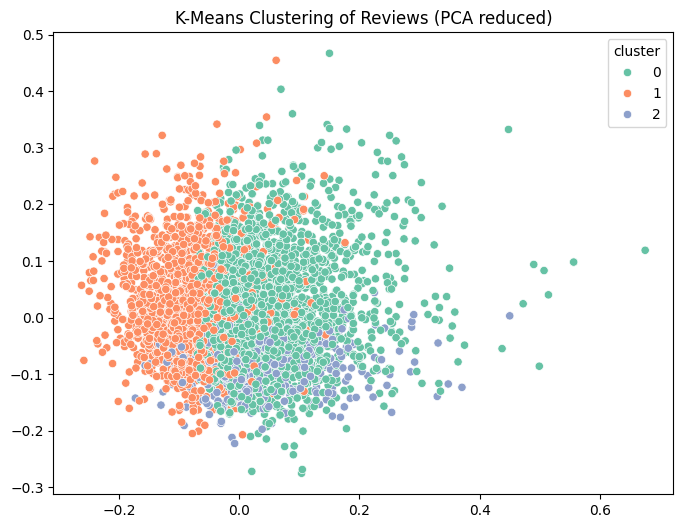

In [ ]:
# Reduce dimensions for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette="Set2")
plt.title("K-Means Clustering of Reviews (PCA reduced)")
plt.show()

In [ ]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(3):
    print(f"\nCluster {i} Keywords:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=" ")
    print()



Cluster 0 Keywords:
works great phone good galaxy price fast storage tablet samsung 

Cluster 1 Keywords:
card sd memory phone sandisk micro cards class 10 galaxy 

Cluster 2 Keywords:
gopro camera video works card hero great use black recording 


In [ ]:
results = {}

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X)
results["DBSCAN"] = (silhouette_score(X, db_labels) if len(set(db_labels))>1 else "N/A",
                     davies_bouldin_score(X.toarray(), db_labels) if len(set(db_labels))>1 else "N/A")

# Hierarchical
hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X.toarray())
results["Hierarchical"] = (silhouette_score(X, hier_labels),
                           davies_bouldin_score(X.toarray(), hier_labels))

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X.toarray())
results["GMM"] = (silhouette_score(X, gmm_labels),
                  davies_bouldin_score(X.toarray(), gmm_labels))

print("\nComparison Results (Silhouette, Davies-Bouldin):")
for method, scores in results.items():
    print(method, ":", scores)



In [ ]:
results = {
    "K-Means": {"Silhouette Score": silhouette, "Davies-Bouldin Index": db_index},
    "DBSCAN": {"Silhouette Score": results["DBSCAN"][0], "Davies-Bouldin Index": results["DBSCAN"][1]},
    "Hierarchical": {"Silhouette Score": results["Hierarchical"][0], "Davies-Bouldin Index": results["Hierarchical"][1]},
    "GMM": {"Silhouette Score": results["GMM"][0], "Davies-Bouldin Index": results["GMM"][1]},
}

results_df = pd.DataFrame(results).T
display(results_df)

# Exclude 'N/A' values from comparison
comparable_results = results_df[results_df['Silhouette Score'] != 'N/A']

best_model = comparable_results["Silhouette Score"].idxmax()
worst_model = comparable_results["Silhouette Score"].idxmin()


print("\n📊 Results Summary:")
print(f"- Best clustering method: {best_model}")
print(f"- Weakest clustering method: {worst_model}")

,Silhouette Score,Davies-Bouldin Index
K-Means,0.004936,11.14923
DBSCAN,N/A,N/A
Hierarchical,-0.000658,13.481905
GMM,0.004872,11.139961



📊 Results Summary:
- Best clustering method: K-Means
- Weakest clustering method: Hierarchical


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Scores
kmeans_score = silhouette_score(X, df['cluster'])
agglo_score = silhouette_score(X.toarray(), hier_labels)
dbscan_score = silhouette_score(X, db_labels) if len(set(db_labels)) > 1 else "N/A" # Exclude noise points
gmm_score = silhouette_score(X.toarray(), gmm_labels)

print("Silhouette Scores:")
print(f"KMeans: {kmeans_score}")
print(f"Agglomerative: {agglo_score}")
print(f"DBSCAN: {dbscan_score}")
print(f"GMM: {gmm_score}")

Silhouette Scores:
KMeans: 0.004936158035478674
Agglomerative: -0.0006579376798733142
DBSCAN: N/A
GMM: 0.0048719266909552405
